In [3]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [12]:
def plot_trajectories(data_file):
    names = {
        'baseline': 'Baseline',
        'deep_supervision': 'DS',
        'deep_supervision_triplet': 'DS + TL',
        'deep_supervision_triplet_velocities': 'DS + TL + VEL'
    }
    with open(data_file, 'r') as f:
        data = json.load(f)
    n = max([len(data[_]['global_drone_pose']) for _ in data.keys()])
    plt.figure()
    plt.title(names[os.path.basename(os.path.dirname(data_file))] + ' trajectories')
    for _ in data.keys():
        plt.scatter(
            [p[0] - data[_]['global_drone_pose'][0][0] for p in data[_]['global_drone_pose'][:n]], 
            [p[1] - data[_]['global_drone_pose'][0][1] for p in data[_]['global_drone_pose'][:n]],
            label=f'run {_}')
    plt.xlabel('m')
    plt.ylabel('m')
    plt.legend(loc='upper right')
    plt.savefig(os.path.join(os.path.dirname(data_file), 'trajectory.png'))


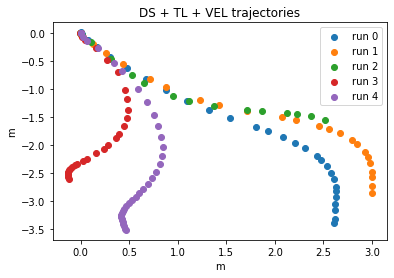

In [13]:
data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom_adjust_brightness/deep_supervision_triplet_velocities/data.json'
plot_trajectories(data_file)


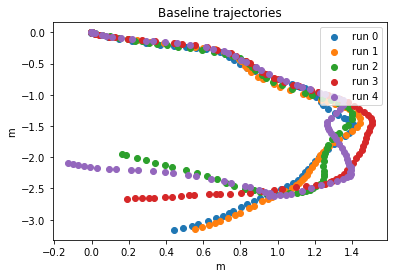

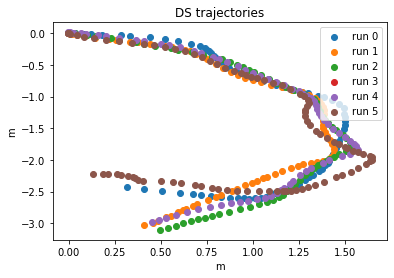

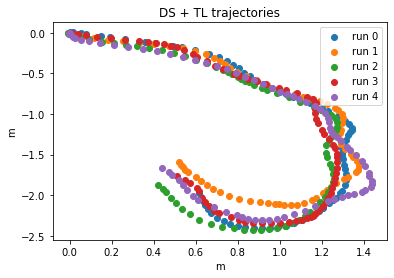

In [5]:
data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom_adjust_brightness/baseline/data.json'
plot_trajectories(data_file)
data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom_adjust_brightness/deep_supervision/data.json'
plot_trajectories(data_file)
data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom_adjust_brightness/deep_supervision_triplet/data.json'
plot_trajectories(data_file)


In [55]:
pose = data['0']['global_drone_pose'][0]
waypoint = data['0']['global_drone_pose'][0]

[-0.6871567530794703,
 -1.1325949034738712,
 2.522773187953547,
 -0.009388648428226596,
 0.005753738230498805,
 -0.8412526238352152,
 0.5405300830364876]

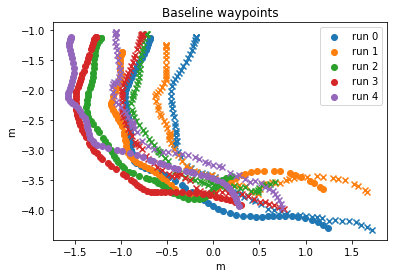

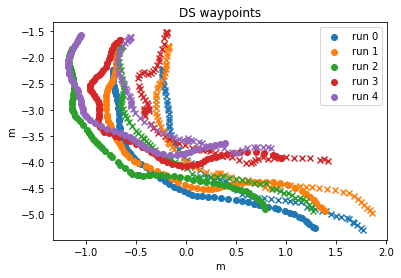

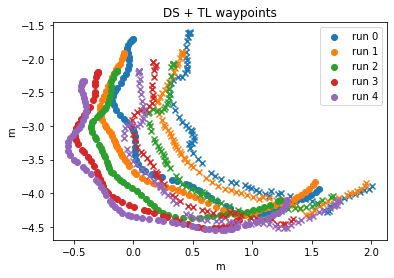

In [54]:
def plot_trajectories_with_waypoints(data_file):
    names = {
        'baseline': 'Baseline',
        'deep_supervision': 'DS',
        'deep_supervision_triplet': 'DS + TL'
    }
    with open(data_file, 'r') as f:
        data = json.load(f)
    n = max([len(data[_]['global_drone_pose']) for _ in data.keys()])
    plt.figure()
    plt.title(names[os.path.basename(os.path.dirname(data_file))] + ' waypoints')
    colors = ['C0', 'C1', 'C2', 'C3', 'C4']
    for i, _ in enumerate(data.keys()):
        plt.scatter(
            [p[0] - data[_]['global_drone_pose'][0][0] for p in data[_]['global_drone_pose'][:n]], 
            [p[1] - data[_]['global_drone_pose'][0][1] for p in data[_]['global_drone_pose'][:n]],
            color=colors[i],
            label=f'run {_}')
        global_waypoints = [
            np.asarray(data[_]['relative_target_location'][i]) + np.asarray(data[_]['global_drone_pose'][i])[:3] - np.asarray(data[_]['global_drone_pose'][0])[:3]
            for i in range(len(data[_]['global_drone_pose']))
        ]
        plt.scatter([p[0] for p in global_waypoints][:n], 
        [p[1] for p in global_waypoints[:n]], marker='x',
        color=colors[i])
    plt.xlabel('m')
    plt.ylabel('m')
    plt.legend(loc='upper right')
    plt.savefig(os.path.join(os.path.dirname(data_file), 'trajectory.png'))

data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom/baseline/data.json'
plot_trajectories_with_waypoints(data_file)
data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom/deep_supervision/data.json'
plot_trajectories_with_waypoints(data_file)
data_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/experimental_data/real_world/droneroom/deep_supervision_triplet/data.json'
plot_trajectories_with_waypoints(data_file)


In [29]:
np.asarray(data['0']['global_drone_pose'][0]).shape

(7,)